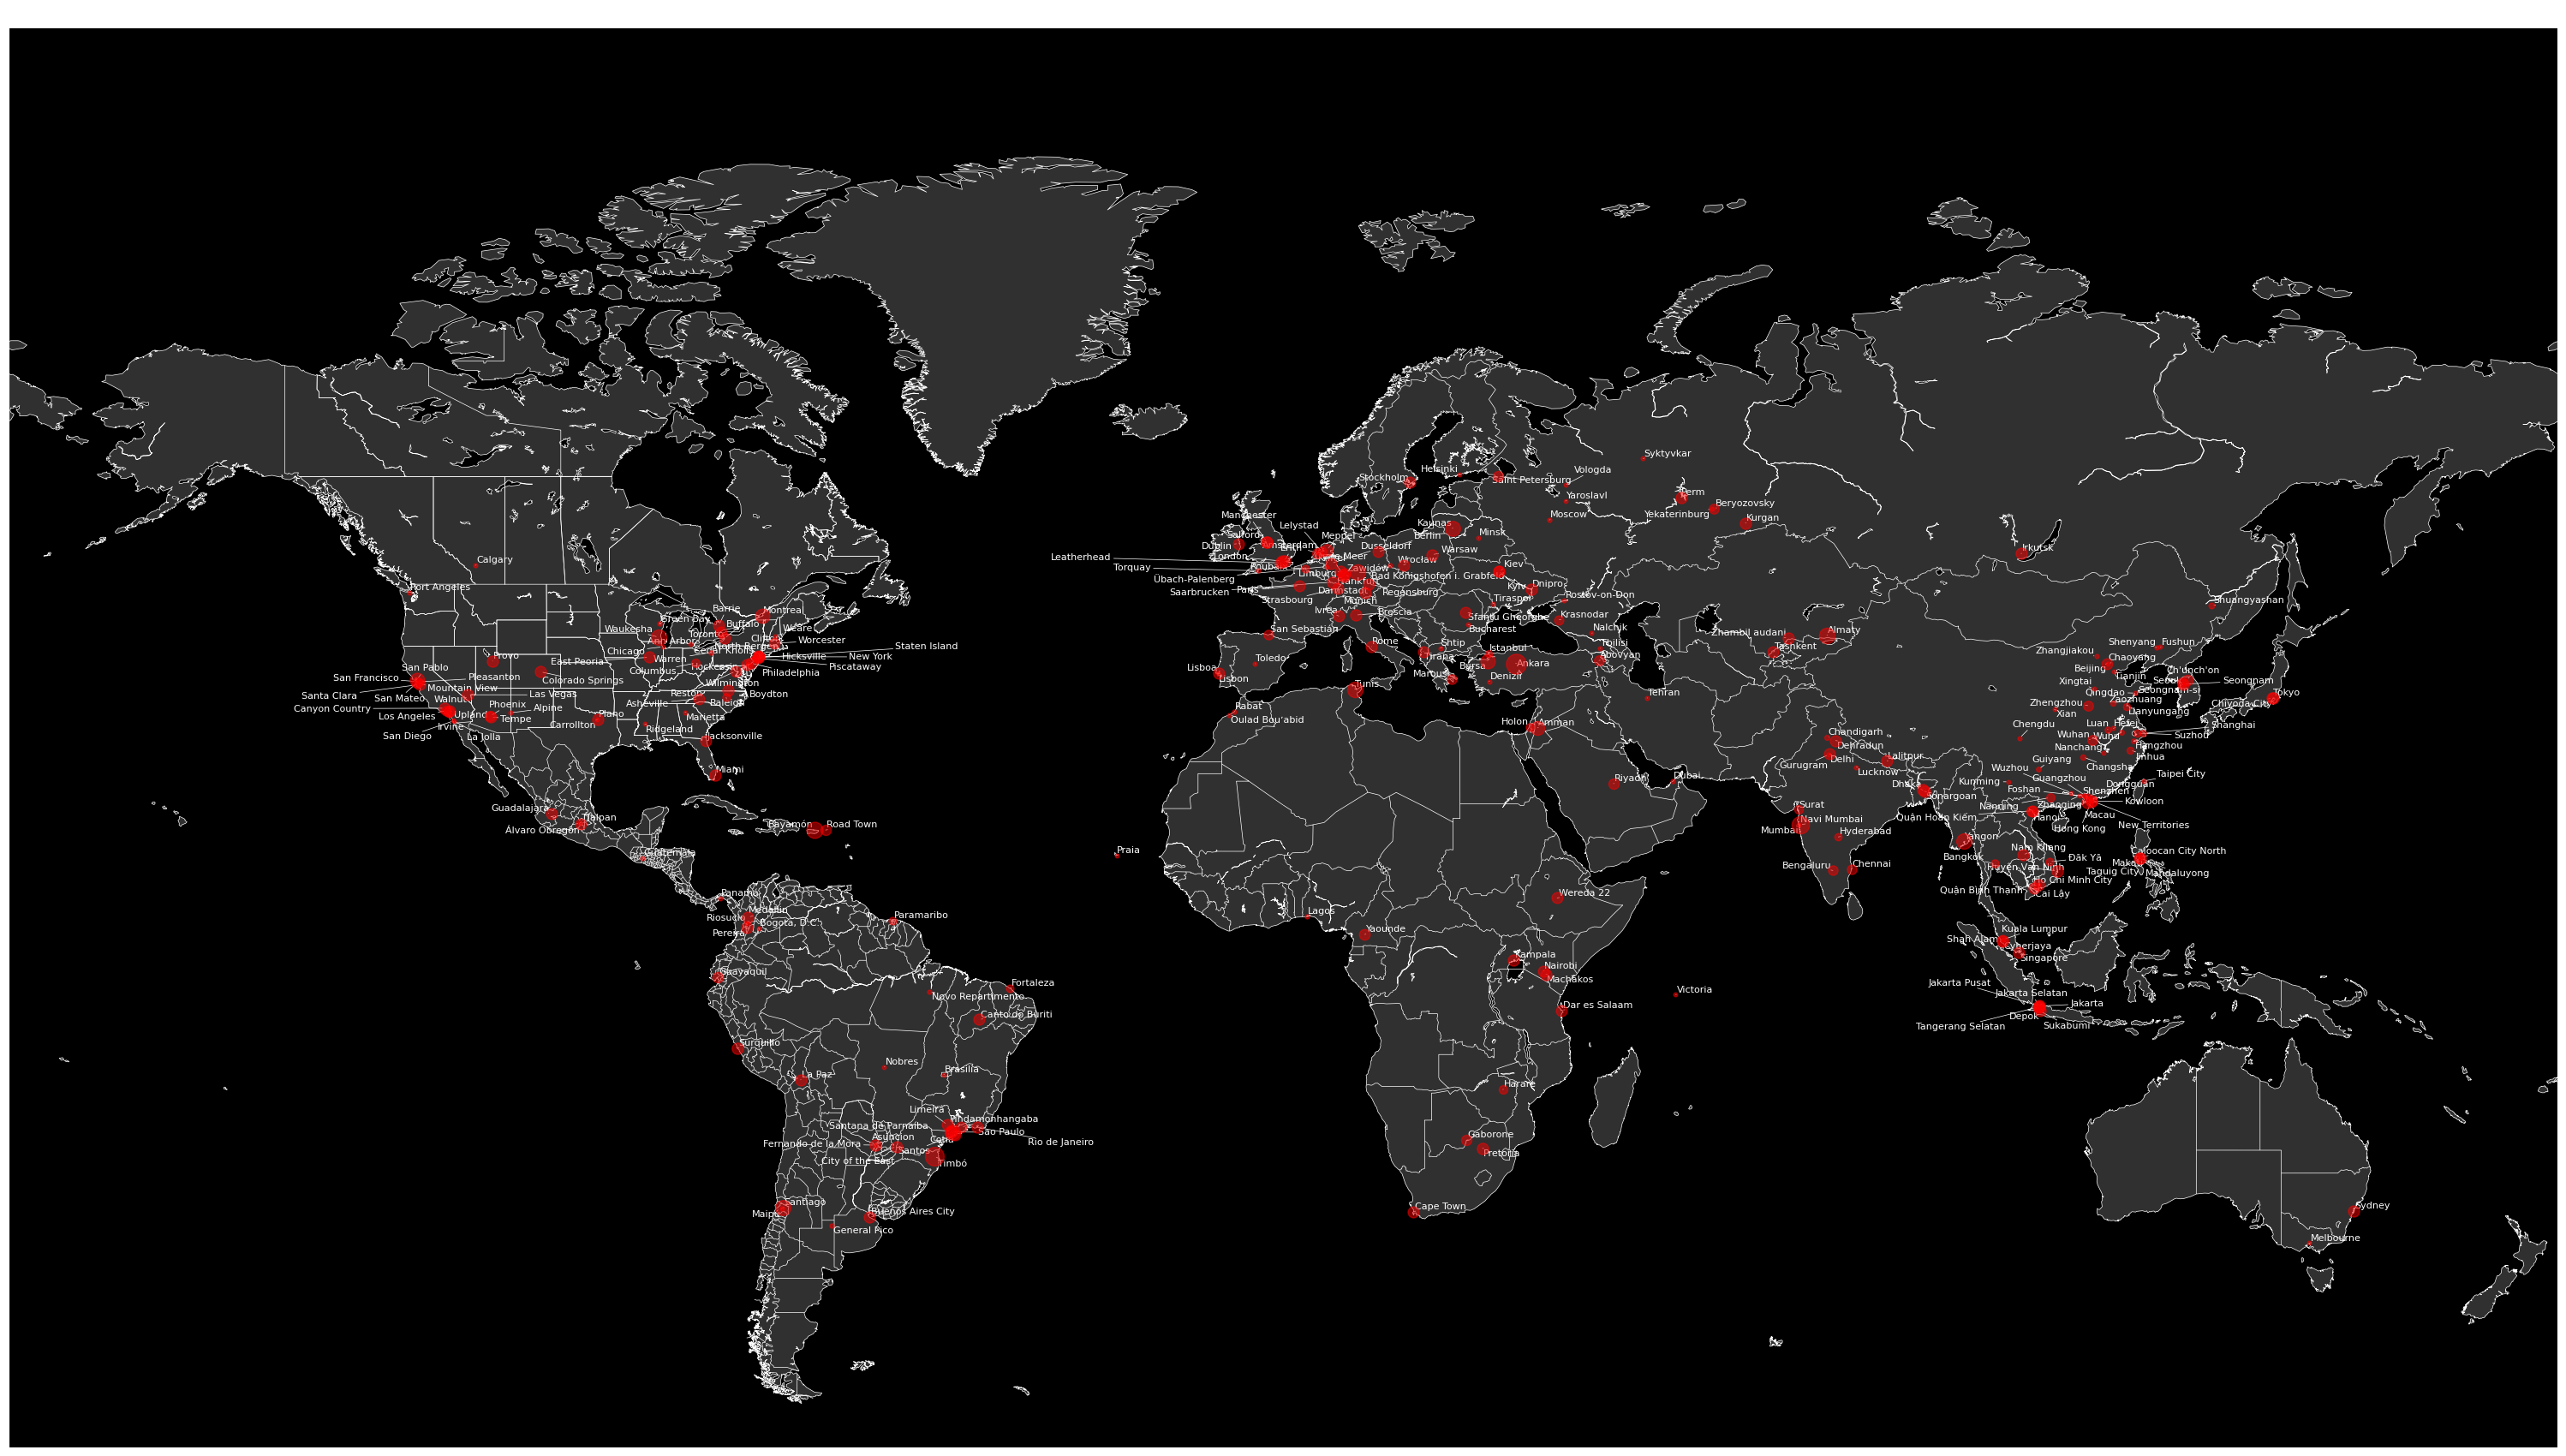

In [1]:
from json import loads
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
from adjustText import adjust_text

with open("processed.json", "r", encoding="utf8") as file:
    map = Basemap(projection="mill", llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution="l")

    # Set figure size to 4K resolution
    plt.figure(figsize=(3840/100, 2160/100), dpi=100)

    # Set dark mode color scheme
    plt.style.use("dark_background")

    # Define map colors
    land_color = "#303030"  # Adjust land color to your preference
    water_color = "black"  # Adjust water color to your preference

    # Draw coastlines, countries, and states with custom colors
    map.drawcoastlines(color="white", linewidth=0.5)
    map.fillcontinents(color=land_color, lake_color=water_color)
    map.drawcountries(color="white", linewidth=0.5)
    map.drawstates(color="white", linewidth=0.5)

    # Lists to store label text and coordinates
    labels = []
    label_coords = []
    city_set = set()

    # Plot each location with spot size based on connection attempts
    for entry in loads(file.read()):
        latitude = float(entry["latitude"])
        longitude = float(entry["longitude"])
        connection_attempts = entry["connection_attempts"]
        city = entry["city"]

        # Check if city has already been plotted
        if city not in city_set:
            x, y = map(longitude, latitude)
            spot_size = 10 + connection_attempts  # Adjust spot size according to your preference
            map.scatter(x, y, s=spot_size, color="red", alpha=0.5, zorder=10)
            labels.append(city)
            label_coords.append((x, y))
            city_set.add(city)

            # Draw arrow from spot to city
            plt.arrow(x, y, 0, 0, color="white", alpha=0.5, width=0.01, head_width=0.2, length_includes_head=True)

    # Adjust text positions to prevent overlap
    texts = [plt.text(coord[0], coord[1], label, fontsize=8, color="white", ha="center") for coord, label in zip(label_coords, labels)]
    adjust_text(texts, arrowprops=dict(arrowstyle="-", color="white", lw=0.5))

    # Save the figure as a 4K resolution image
    plt.savefig("connection_attempts_map.png", dpi=400)

    # Show the map
    plt.title("Connection Attempts", color="white")
    plt.savefig("world_map.png")
    plt.show()
    file.close()